In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import sklearn
import sklearn.preprocessing
import sklearn.metrics

Using TensorFlow backend.


In [57]:
url = 'https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv'
dataframe = pd.read_csv(url, sep=';')

In [58]:
np.random.seed(7)
dataset = dataframe.Passengers.values
dataset = dataset.astype('float32').reshape(-1, 1)

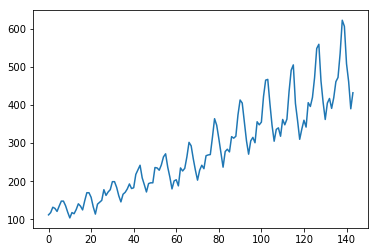

In [59]:
plt.plot(dataset)

In [61]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

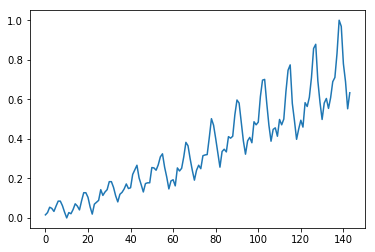

In [62]:
plt.plot(dataset)

In [63]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [64]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [65]:
example_data = np.array(range(10))[:,np.newaxis]

In [66]:
create_dataset(example_data, look_back=2)

(array([[0, 1],
        [1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6],
        [6, 7]]), array([2, 3, 4, 5, 6, 7, 8]))

In [67]:
train.shape

(96, 1)

In [68]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [69]:
trainX.shape

(93, 2)

In [70]:
trainY.shape

(93,)

In [71]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [72]:
trainX.shape

(93, 1, 2)

In [73]:
testX.shape

(45, 1, 2)

In [74]:
# create and fit the LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0456
Epoch 2/100
 - 0s - loss: 0.0206
Epoch 3/100
 - 0s - loss: 0.0147
Epoch 4/100
 - 0s - loss: 0.0129
Epoch 5/100
 - 0s - loss: 0.0116
Epoch 6/100
 - 0s - loss: 0.0104
Epoch 7/100
 - 0s - loss: 0.0091
Epoch 8/100
 - 0s - loss: 0.0081
Epoch 9/100
 - 0s - loss: 0.0071
Epoch 10/100
 - 0s - loss: 0.0062
Epoch 11/100
 - 0s - loss: 0.0056
Epoch 12/100
 - 0s - loss: 0.0049
Epoch 13/100
 - 0s - loss: 0.0045
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0041
Epoch 16/100
 - 0s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0038
Epoch 18/100
 - 0s - loss: 0.0038
Epoch 19/100
 - 0s - loss: 0.0038
Epoch 20/100
 - 0s - loss: 0.0037
Epoch 21/100
 - 0s - loss: 0.0037
Epoch 22/100
 - 0s - loss: 0.0037
Epoch 23/100
 - 0s - loss: 0.0036
Epoch 24/100
 - 0s - loss: 0.0035
Epoch 25/100
 - 0s - loss: 0.0035
Epoch 26/100
 - 0s - loss: 0.0035
Epoch 27/100
 - 0s - loss: 0.0035
Epoch 28/100
 - 0s - loss: 0.0036
Epoch 29/100
 - 0s - loss: 0.0035
Epoch 30/100
 - 0s - lo

In [111]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

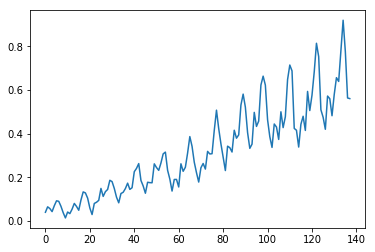

In [112]:
plt.plot(np.vstack([trainPredict, testPredict]))

http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/